# Importing Key Libraries 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Loading and Reading the Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving CreditCardData.csv to CreditCardData (1).csv


In [ ]:
import io
 
datf = pd.read_csv(io.BytesIO(uploaded['CreditCardData.csv']))
print(datf)

      Transaction ID       Date  Time Type of Card Entry Mode Amount  \
0          #2546 884  13-Oct-20    23   MasterCard        Tap    £17   
1          #2546 895  14-Oct-20    21         Visa        Tap    £28   
2          #2546 903  13-Oct-20    19         Visa        Tap     £8   
3          #2546 906  14-Oct-20     9   MasterCard        PIN   £186   
4          #2546 920  13-Oct-20    22         Visa        PIN    £86   
...              ...        ...   ...          ...        ...    ...   
99995      #3687 420  13-Oct-20    21   MasterCard        Tap    £30   
99996      #3687 421  14-Oct-20    15         Visa        Tap     £5   
99997      #3687 424  13-Oct-20    21   MasterCard        PIN   £375   
99998      #3687 433  14-Oct-20    11         Visa        Tap    £12   
99999      #3687 455  13-Oct-20     9   MasterCard        PIN   £306   

      Type of Transaction Merchant Group Country of Transaction  \
0                  Online     Restaurant         United Kingdom   
1

In [ ]:
#datf=pd.read_csv("./CreditCardData.csv")
datf.head(5)

,Transaction ID,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#2546 884,13-Oct-20,23,MasterCard,Tap,£17,Online,Restaurant,United Kingdom,Russia,United Kingdom,F,36,Barclays,0
1,#2546 895,14-Oct-20,21,Visa,Tap,£28,Online,Gaming,United Kingdom,United Kingdom,United Kingdom,M,41,RBS,0
2,#2546 903,13-Oct-20,19,Visa,Tap,£8,Online,Subscription,United Kingdom,United Kingdom,United Kingdom,M,32,Barclays,0
3,#2546 906,14-Oct-20,9,MasterCard,PIN,£186,ATM,Entertainment,United Kingdom,United Kingdom,United Kingdom,F,65,Barclays,0
4,#2546 920,13-Oct-20,22,Visa,PIN,£86,Online,Children,United Kingdom,United Kingdom,United Kingdom,F,61,Monzo,0


# Exploratory Data Analysis (EDA)

### Dataset Information

In [ ]:
datf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Transaction ID          100000 non-null  object
 1   Date                    100000 non-null  object
 2   Time                    100000 non-null  int64 
 3   Type of Card            100000 non-null  object
 4   Entry Mode              100000 non-null  object
 5   Amount                  100000 non-null  object
 6   Type of Transaction     100000 non-null  object
 7   Merchant Group          100000 non-null  object
 8   Country of Transaction  100000 non-null  object
 9   Shipping Address        100000 non-null  object
 10  Country of Residence    100000 non-null  object
 11  Gender                  100000 non-null  object
 12  Age                     100000 non-null  int64 
 13  Bank                    100000 non-null  object
 14  Fraud                   100000 non-nu

### Data Value Counts in Each Variable

In [ ]:
datf.count()

Transaction ID            100000
Date                      100000
Time                      100000
Type of Card              100000
Entry Mode                100000
Amount                    100000
Type of Transaction       100000
Merchant Group            100000
Country of Transaction    100000
Shipping Address          100000
Country of Residence      100000
Gender                    100000
Age                       100000
Bank                      100000
Fraud                     100000
dtype: int64

### Dataframe Size

In [ ]:
datf.size

1500000

### Datatypes of Each Variable

In [ ]:
datf.dtypes

Transaction ID            object
Date                      object
Time                       int64
Type of Card              object
Entry Mode                object
Amount                    object
Type of Transaction       object
Merchant Group            object
Country of Transaction    object
Shipping Address          object
Country of Residence      object
Gender                    object
Age                        int64
Bank                      object
Fraud                      int64
dtype: object

## Data Preprocessing 

### Data Transformation 

In [ ]:
datf[['Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group', 'Country of Transaction', 'Shipping Address', 'Country of Residence', 'Gender', 'Bank']] = datf[['Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group', 'Country of Transaction', 'Shipping Address', 'Country of Residence', 'Gender', 'Bank']].apply(lambda col:pd.Categorical(col).codes)

### Checking the Results of Data Transformation 

In [ ]:
datf.dtypes

Transaction ID            object
Date                      object
Time                       int64
Type of Card                int8
Entry Mode                  int8
Amount                    object
Type of Transaction         int8
Merchant Group              int8
Country of Transaction      int8
Shipping Address            int8
Country of Residence        int8
Gender                      int8
Age                        int64
Bank                        int8
Fraud                      int64
dtype: object

### Checking for Null Values

In [ ]:
datf.isnull().sum()

Transaction ID            0
Date                      0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64

### Checking for Outliers using Box Plots 

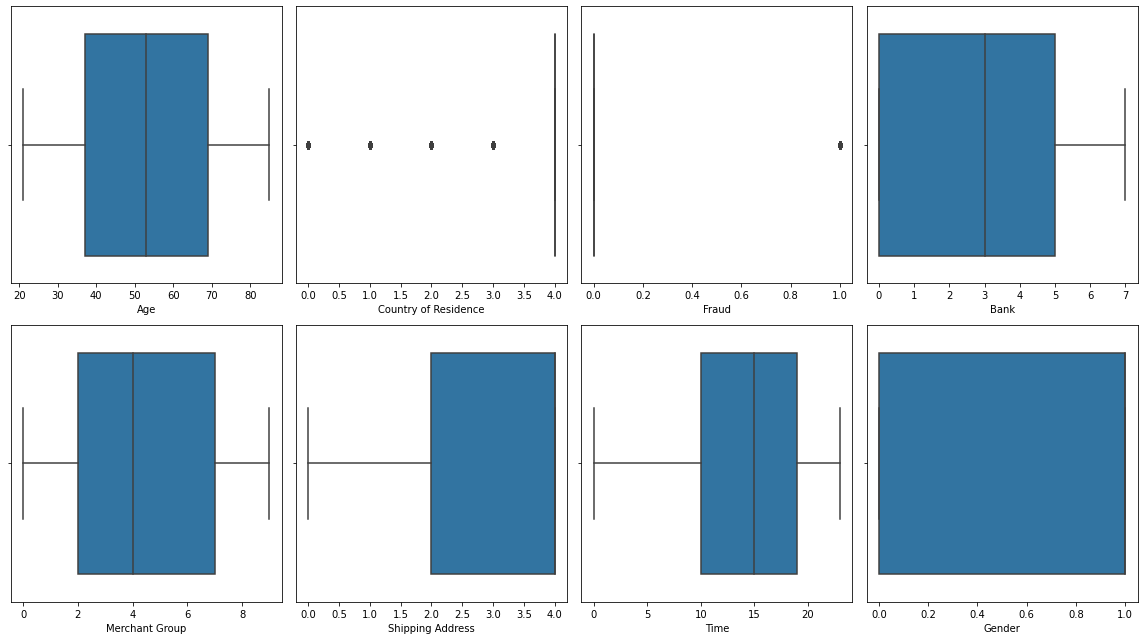

In [ ]:
fig, axs = plt.subplots(2,4, figsize = (16,9))
plt1 = sns.boxplot(datf['Age'], ax = axs[0,0])
plt2 = sns.boxplot(datf['Country of Residence'], ax = axs[0,1])
plt3 = sns.boxplot(datf['Fraud'], ax = axs[0,2])
plt4 = sns.boxplot(datf['Bank'], ax = axs[0,3])
plt1 = sns.boxplot(datf['Merchant Group'], ax = axs[1,0])
plt2 = sns.boxplot(datf['Shipping Address'], ax = axs[1,1])
plt3 = sns.boxplot(datf['Time'], ax = axs[1,2])
plt4 = sns.boxplot(datf['Gender'], ax = axs[1,3])
plt.tight_layout()

## Descriptive Statistics of the Dataset

In [ ]:
datf.describe()

,Time,Type of Card,Entry Mode,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
count,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,14.559320,0.538120,0.49837,0.99968,4.483460,3.283010,3.029080,3.548490,0.508770,53.081630,2.807430,0.071900
std,5.315905,0.498547,0.50000,0.81559,2.888098,1.277455,1.400441,1.071298,0.499926,18.742452,2.484586,0.258324
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000
25%,10.000000,0.000000,0.00000,0.00000,2.000000,3.000000,2.000000,4.000000,0.000000,37.000000,0.000000,0.000000
50%,15.000000,1.000000,0.00000,1.00000,4.000000,4.000000,4.000000,4.000000,1.000000,53.000000,3.000000,0.000000
75%,19.000000,1.000000,1.00000,2.00000,7.000000,4.000000,4.000000,4.000000,1.000000,69.000000,5.000000,0.000000
max,23.000000,1.000000,1.00000,2.00000,9.000000,4.000000,4.000000,4.000000,1.000000,85.000000,7.000000,1.000000


## Correlation Heatmap of the Dataset

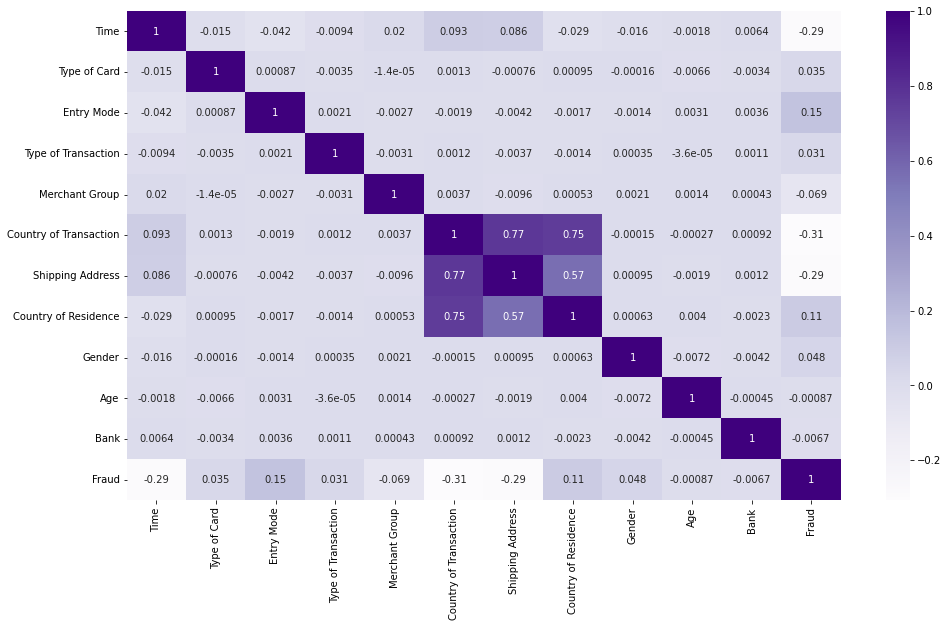

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(datf.corr(), annot = True, cmap="Purples")
plt.show()

### Findings Most Important Features associated with the Target Variable 

In [ ]:
print("Find most key features associated with the target variable:")
corr1=datf.corr()
corr1.sort_values(['Fraud'], ascending=False, inplace=True)
corr1.Fraud

Find most key features associated with the target variable:


Fraud                     1.000000
Entry Mode                0.152347
Country of Residence      0.105997
Gender                    0.047540
Type of Card              0.034703
Type of Transaction       0.030676
Age                      -0.000867
Bank                     -0.006660
Merchant Group           -0.069044
Time                     -0.288598
Shipping Address         -0.292487
Country of Transaction   -0.307001
Name: Fraud, dtype: float64

## Data Visualisation

### Relationship between Shipping Address and Country of Residence

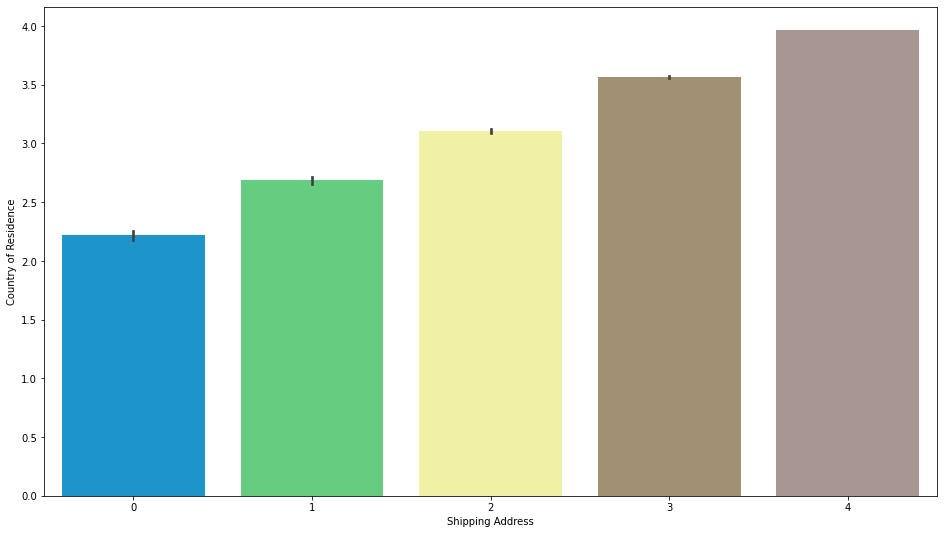

In [ ]:
fig = plt.figure(figsize = (16,9))
sns.barplot(x = 'Shipping Address', y = 'Country of Residence', palette = 'terrain', data = datf)

###  Relationship between Type of Card and Time

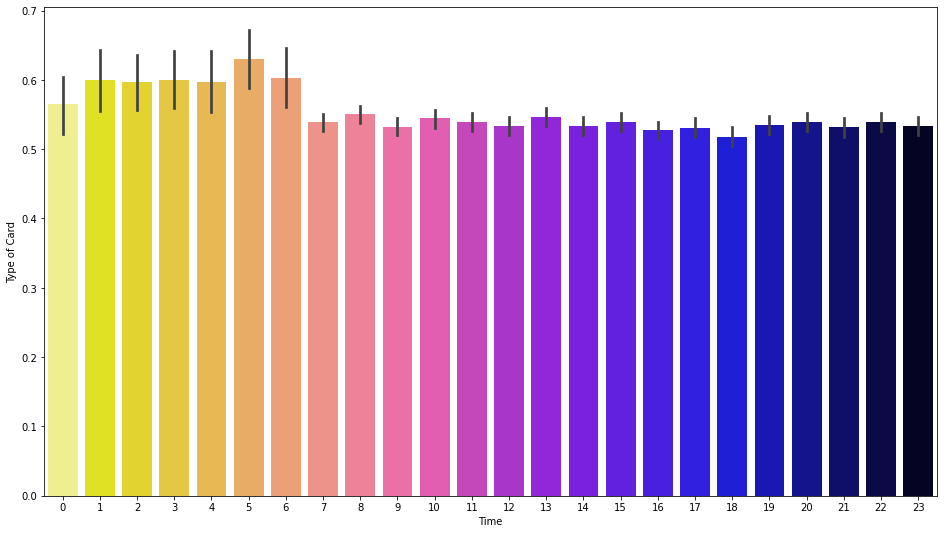

In [ ]:
fig = plt.figure(figsize = (16,9))
sns.barplot(x = 'Time', y = 'Type of Card', palette = 'gnuplot2_r', data = datf)

### Country of Transaction

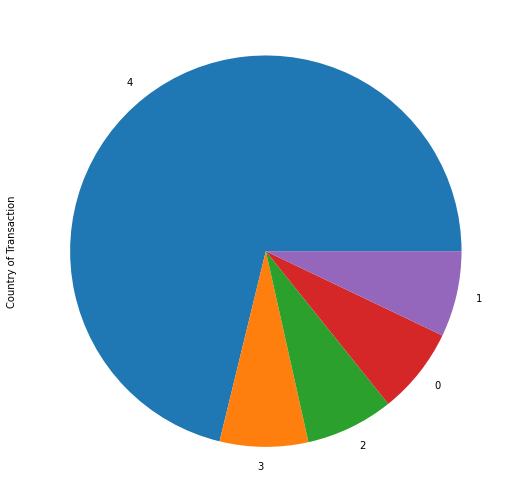

In [ ]:
plt.figure(figsize=(16,9))
datf['Country of Transaction'].value_counts().plot.pie()

### Bank 

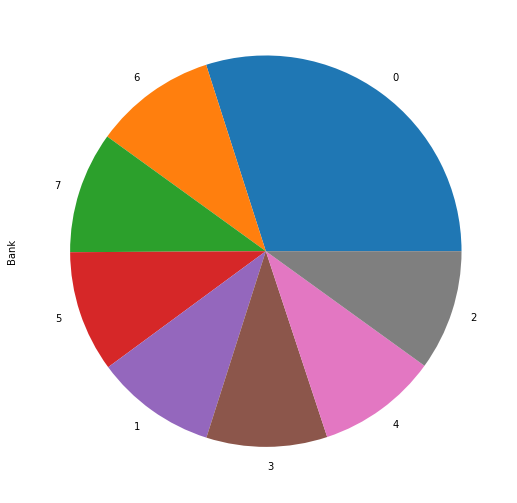

In [ ]:
plt.figure(figsize=(16,9))
datf['Bank'].value_counts().plot.pie()

### Pairplot of Dataset

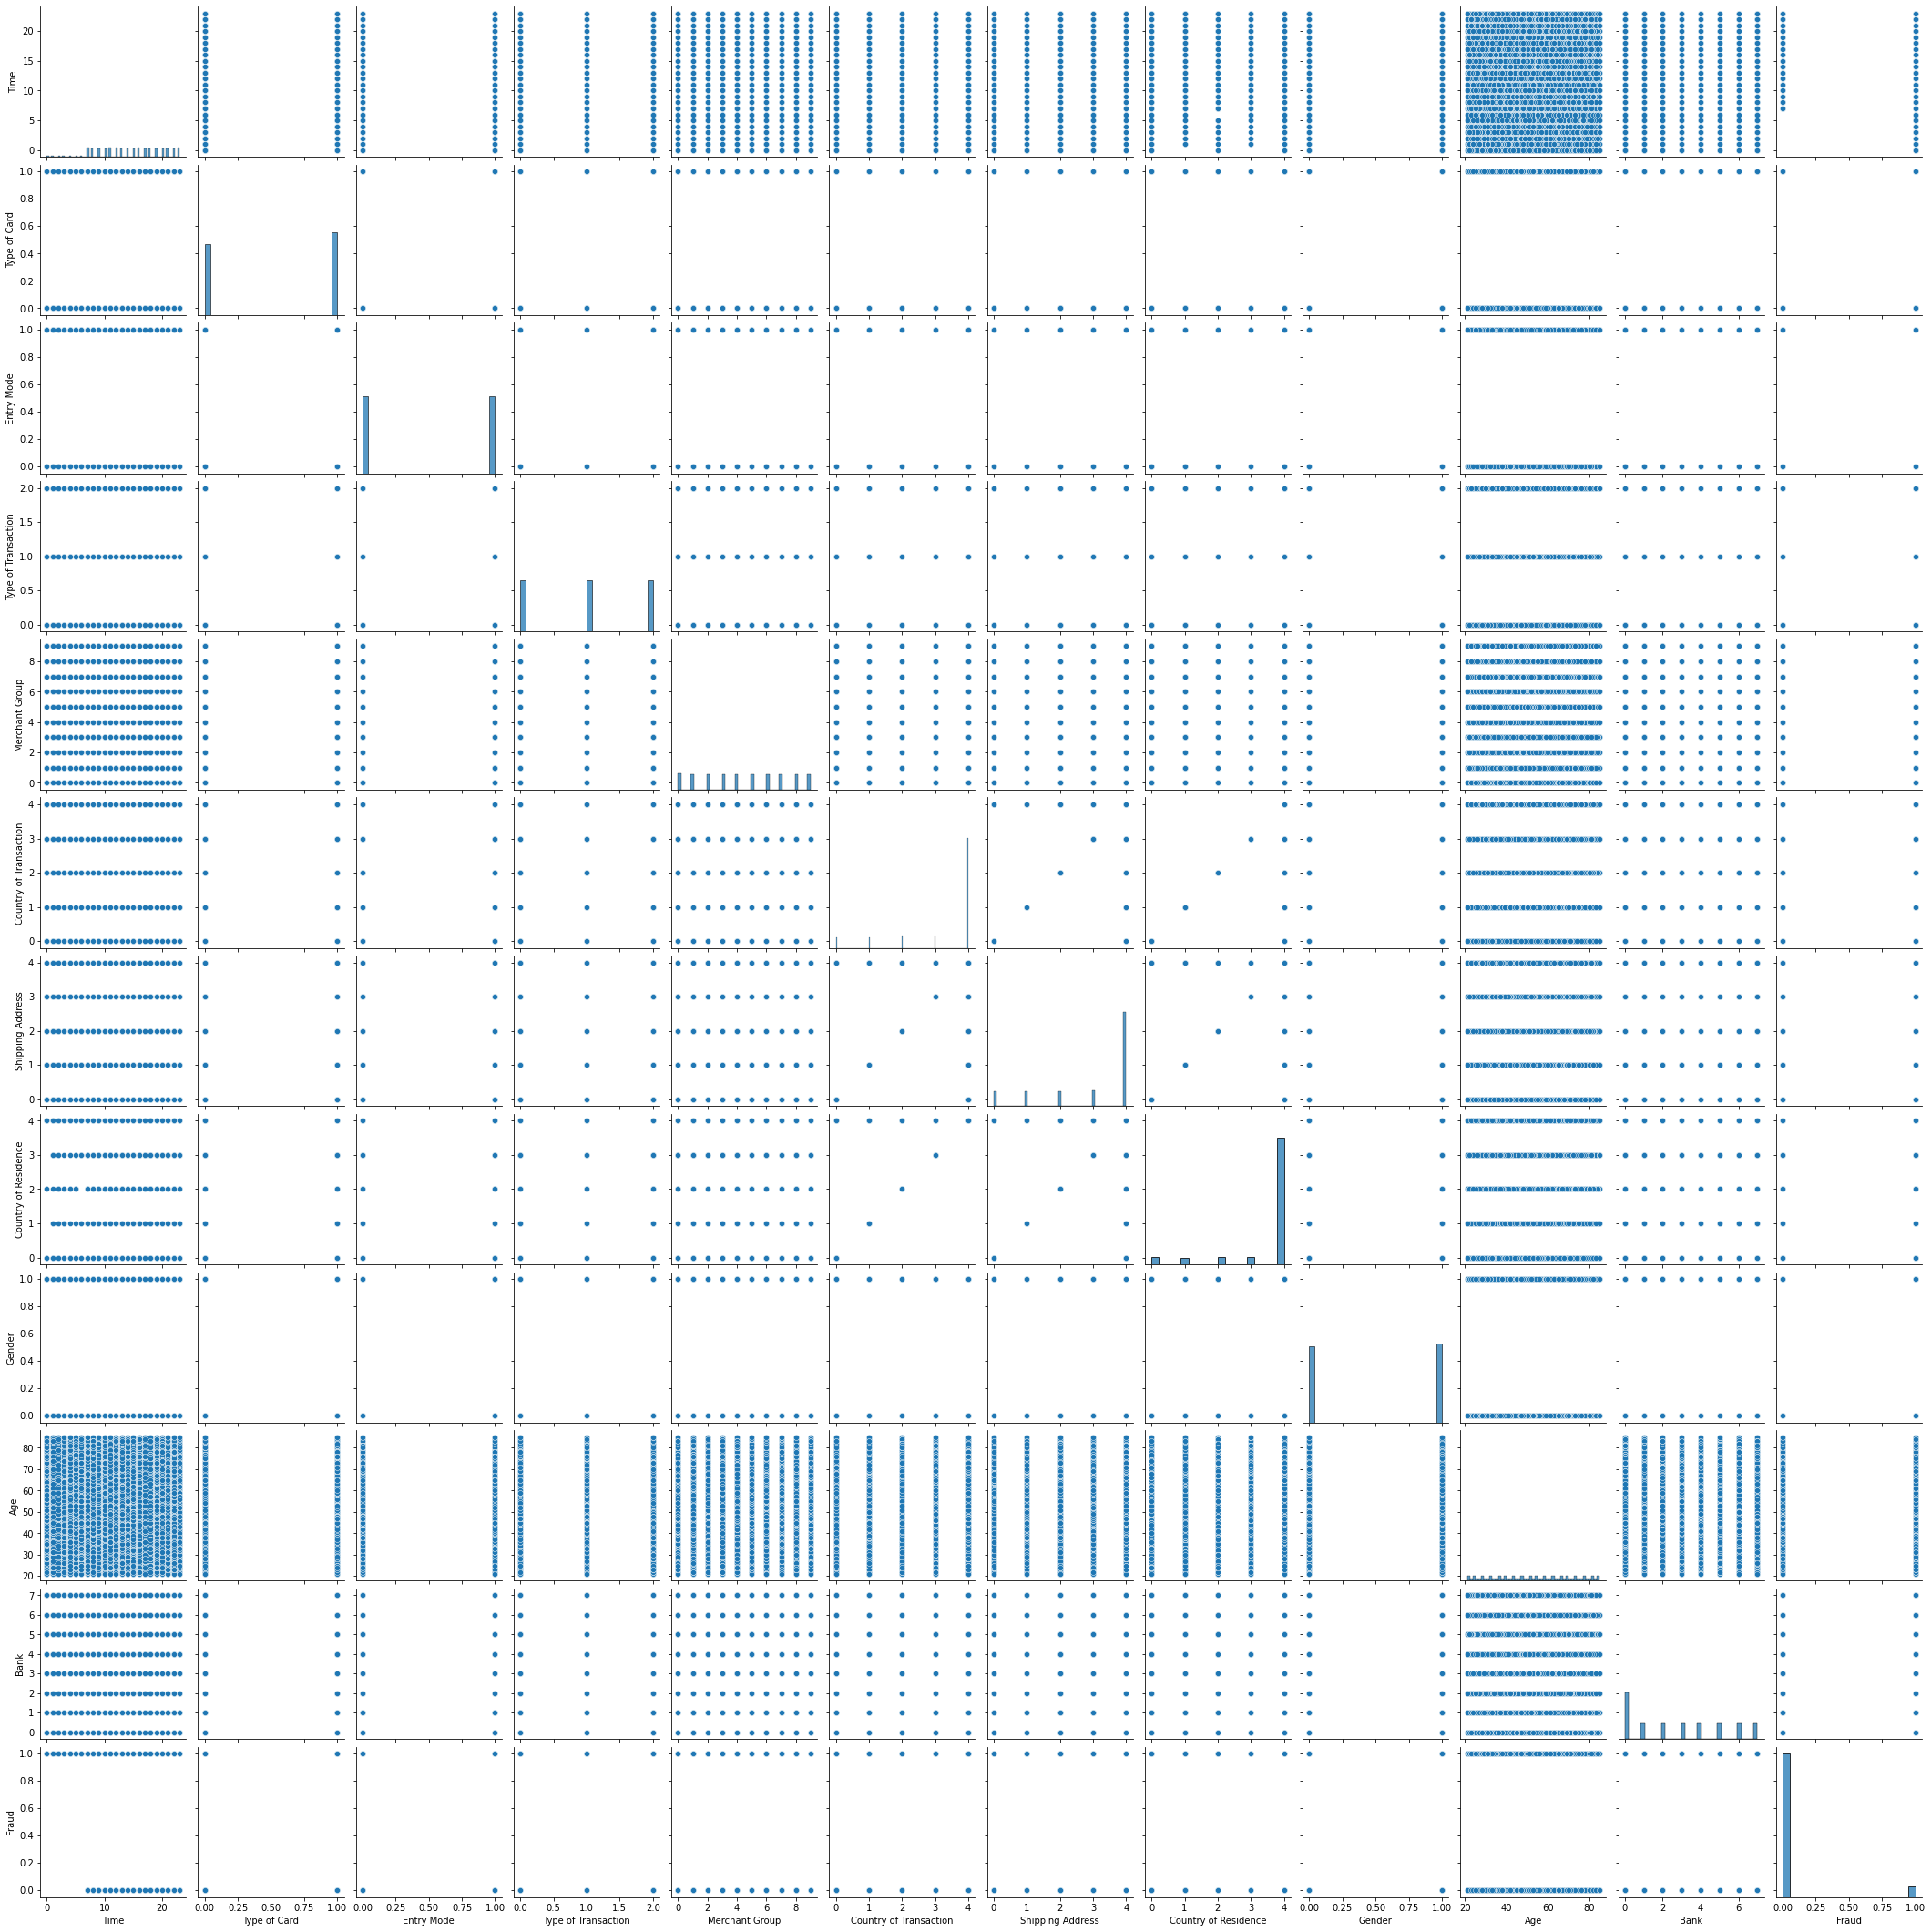

In [ ]:
sns.pairplot(datf)
plt.show()

# Implementation of Fraud Detection Machine Learning Models

### Feature Selection and Dataframe Splitting 

In [ ]:
from sklearn.model_selection import train_test_split
X = datf.drop(['Fraud','Age','Bank','Merchant Group','Time','Shipping Address','Country of Transaction','Transaction ID','Amount','Date'], axis=1)
y = datf['Fraud'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Logistic Regression Classifier Model Fitting 

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
print("Accuracy of Logistic Regression Classifier is: ", log.score(X_test,y_test))

Accuracy of Logistic Regression Classifier is:  0.92945


### Logistic Regression Classifier Model Evaluation 

In [ ]:
from sklearn import metrics
y_pred=log.predict(X_test)

In [ ]:
print("Accuracy of the Logistic Regression Classifier after Prediction is:",metrics.accuracy_score(y_test, y_pred))

Accuracy of the Logistic Regression Classifier after Prediction is: 0.92945


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[18589,     0],
       [ 1411,     0]])

Text(0.5, 257.44, 'Predicted label')

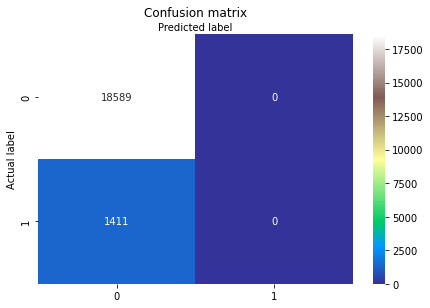

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="terrain" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Random Forest Classifier Model Fitting 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train,y_train)
print("Accuracy of Random Forest Classifier: ", rf.score(X_test,y_test))

Accuracy of Random Forest Classifier:  0.92945


### Random Forest Classifier Model Evaluation

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
print("Accuracy of the Random Forest Classifier after Prediction is:",metrics.accuracy_score(y_test, y_pred))

Accuracy of the Random Forest Classifier after Prediction is: 0.92945


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[18589,     0],
       [ 1411,     0]])

Text(0.5, 257.44, 'Predicted label')

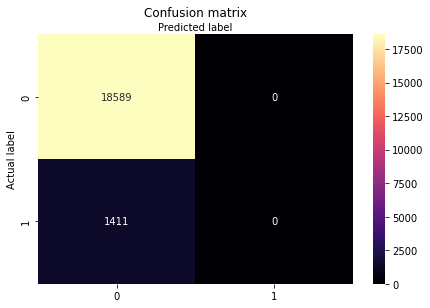

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="magma" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')